# Домашнее задание по теме: корреляция и зависимость

## Тест

Пройти [тест](https://forms.gle/8mX7ovjmDeGc8Vq7A)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy pandas seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import scipy
from scipy import stats

scipy.__version__

'1.6.1'

## Загрузка данных

[Источник (Chocolate Bar Ratings)](https://www.kaggle.com/rtatman/chocolate-bar-ratings)

[Описание колонок](http://flavorsofcacao.com/chocolate_database.html)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [8]:
# загрузить датасет в pandas dataframe
df = pd.read_csv("./../../data/winequality-red.csv")

# вывести первые 5 и последние 5 строк
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Задание

**ВНИМАНИЕ:** при переносе этого файла в свой репозиторий необходимо дополнительно скопировать директорию `03_data_analysis/hw/images`, так как там содержаться изображения для задания.

- Далее в заданиях будут использованы сокращенные называния с помощью `(=название)`. Это нужно для удобства описания.
- Можно использовать любые названия для переменных.
- Графики должны быть максимально похожи на заданное изображение, но не обязательно идентичными
(по желанию можно менять что-то, сохраняя сложность построения изображения). Важные замечания будут даны в комментарии к конкретному графику (например: "Цвет из палитры CSS" значит ЛЮБОЙ цвет из списка).

**Для определения цвета** можно использовать [сайт](https://sanstv.ru/color).

## Матрица корреляции

In [9]:
# вычислить матрицу корреляции для полного data frame
corr = df.corr()

# вывести матрицу корреляции
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**ВНИМАНИЕ:**
- Цвет из цветовой карты (см. [список](https://matplotlib.org/stable/tutorials/colors/colormaps.html)).
- Размер фигуры.
- Размер и формат чисел.

<AxesSubplot:>

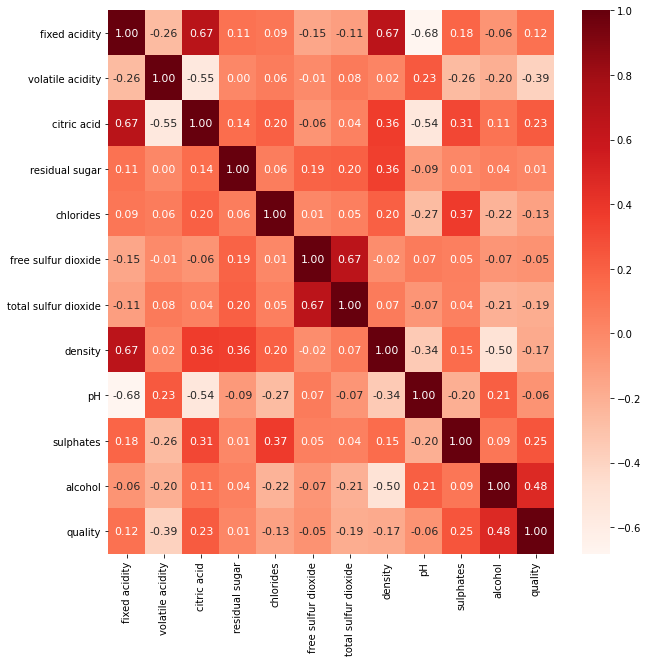

In [10]:
# изменить размер фигуры
plt.figure(figsize=(10, 10))

# heatmap (матрица корреляции) на основе полного data frame
sns.heatmap(corr,
            cmap="Reds", 
            annot=True, 
            annot_kws={"size": 11}, 
            fmt="1.2f")

In [11]:
# перезаписать dataframe так, чтобы там остались только столбцы:
# 'pH', 'alcohol', 'density', 'fixed acidity'
df = df[['pH', 
         'alcohol', 
         'density', 
         'fixed acidity']]

## Матрица рассеивания (`pandas.plotting.scatter_matrix`)

**ВНИМАНИЕ:**
- Маркер для `scatter`.
- Размер фигуры.

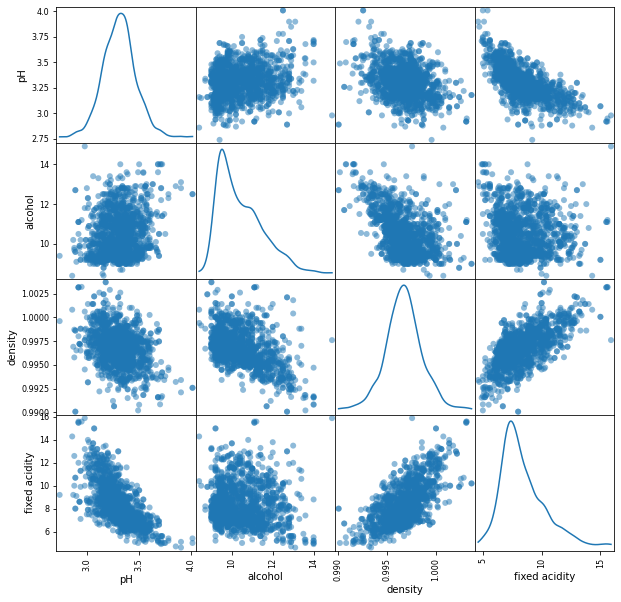

In [12]:
# матрица рассеивания на основе data frame
scatter_matrix(df, 
               figsize=(10, 10), 
               diagonal='kde', 
               marker='o')

plt.savefig(fname='images/12/scatter_matrix.png',
            format='png',
            bbox_inches='tight')

## `seaborn.pairplot`

- Маркер для `scatter`.
- Размер фигуры.

<Figure size 1008x1008 with 0 Axes>

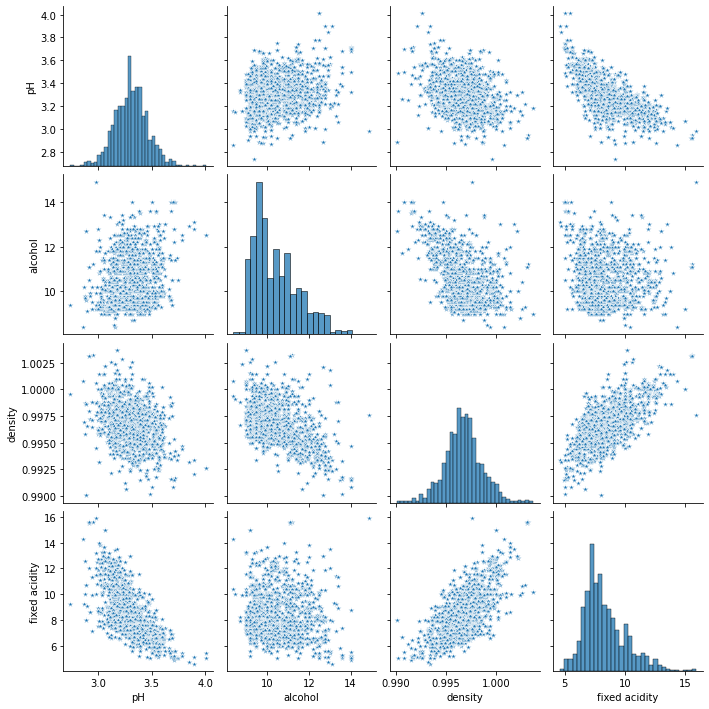

In [13]:
# изменить размер фигуры
plt.figure(figsize=(14, 14))

# pairplot на основе data frame
sns.pairplot(df, 
             markers='*')

plt.savefig(fname='images/12/pairplot.png',
            format='png',
            bbox_inches='tight')

## `seaborn.PairGrid`

- Цвет из цветовой карты (см. [список](https://matplotlib.org/stable/tutorials/colors/colormaps.html)).
- Цвет из палитры `CSS` (см. [список](https://matplotlib.org/stable/gallery/color/named_colors.html)).
- Размер, формат и расположение чисел.

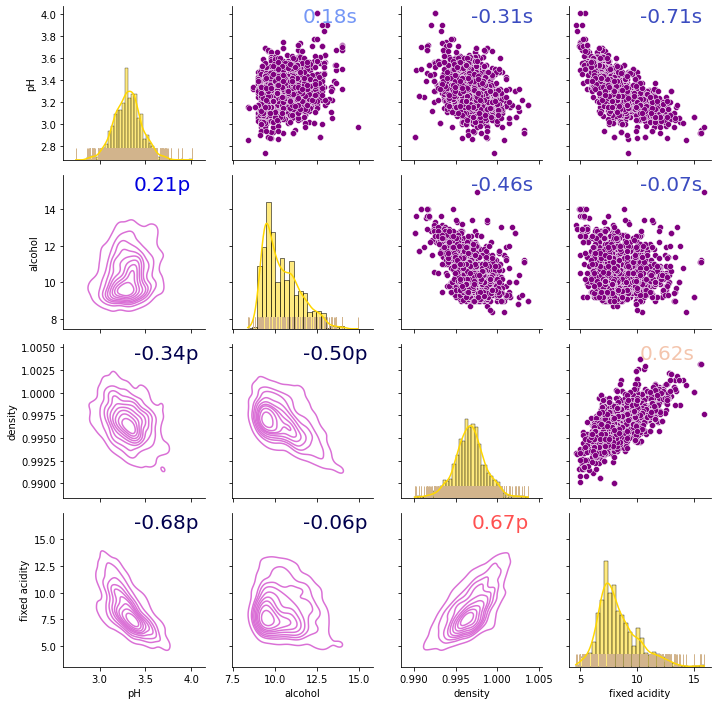

In [14]:
# colormaps: seismic и coolwarm
# график c коэффициентами корреляции

# функция, которая вычисляет коэффициент корреляции и 
# добавляет его в качестве "аннотации"
def corr(x, y, cor_name='pearson', **kwargs):
    if cor_name == 'pearson':
        suffix = 'p'
        r, _ = stats.pearsonr(x, y)
        cmap = plt.get_cmap('seismic')
        xy=(0.5, 0.9)
        
    elif cor_name == 'spearman':
        suffix = 's'
        r, _ = stats.spearmanr(x, y)
        cmap = plt.get_cmap('coolwarm')
        xy=(0.5, 0.9)
        
    ax = plt.gca()
    ax.annotate(text="{:.2f}{}".format(r, suffix),
                xy=xy,
                xycoords=ax.transAxes,
                size=20,
                color=cmap(r))         
    
# объект PairGrid на основе data frame
g = sns.PairGrid(df)

# верхние графики scatter с корреляцией Спирмена
g.map_upper(sns.scatterplot, color='purple')
g.map_upper(corr, cor_name='spearman')

# диагональ hist + rug
g.map_diag(sns.histplot, color='gold', kde=True)
g.map_diag(sns.rugplot, color='tan', height=0.08)

# нижние графики kde с корреляцией Пирсона
g.map_lower(sns.kdeplot, color='orchid')
g.map_lower(corr, cor_name='pearson')

plt.savefig(fname='images/12/pairgrid.png',
            format='png',
            bbox_inches='tight')